In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('../dati/serie-storiche-ecommerce.csv', quotechar = "'", parse_dates = ['data'], decimal = ',')

In [11]:
df = df.assign(year = df.data.dt.year,
               month = df.data.dt.month,
               day = df.data.dt.day,
               DayOfWeek = df.data.dt.dayofweek)

In [10]:
df

,data,totale,settore,year,month,day,DayOfWeek
0,2013-02-01,815.97,Calcio,2013,2,1,4
1,2013-02-21,4775.75,Fitness,2013,2,21,3
2,2013-04-01,4775.75,Fitness,2013,4,1,0
3,2013-04-06,1962.15,Casual,2013,4,6,5
4,2013-07-09,1809.87,Basket,2013,7,9,1
...,...,...,...,...,...,...,...
25256,2022-04-06,513.87,Sci,2022,4,6,2
25257,2022-04-07,6076.12,Casual,2022,4,7,3
25258,2022-04-07,597.65,Fitness,2022,4,7,3
25259,2022-04-07,567.63,Pesca,2022,4,7,3


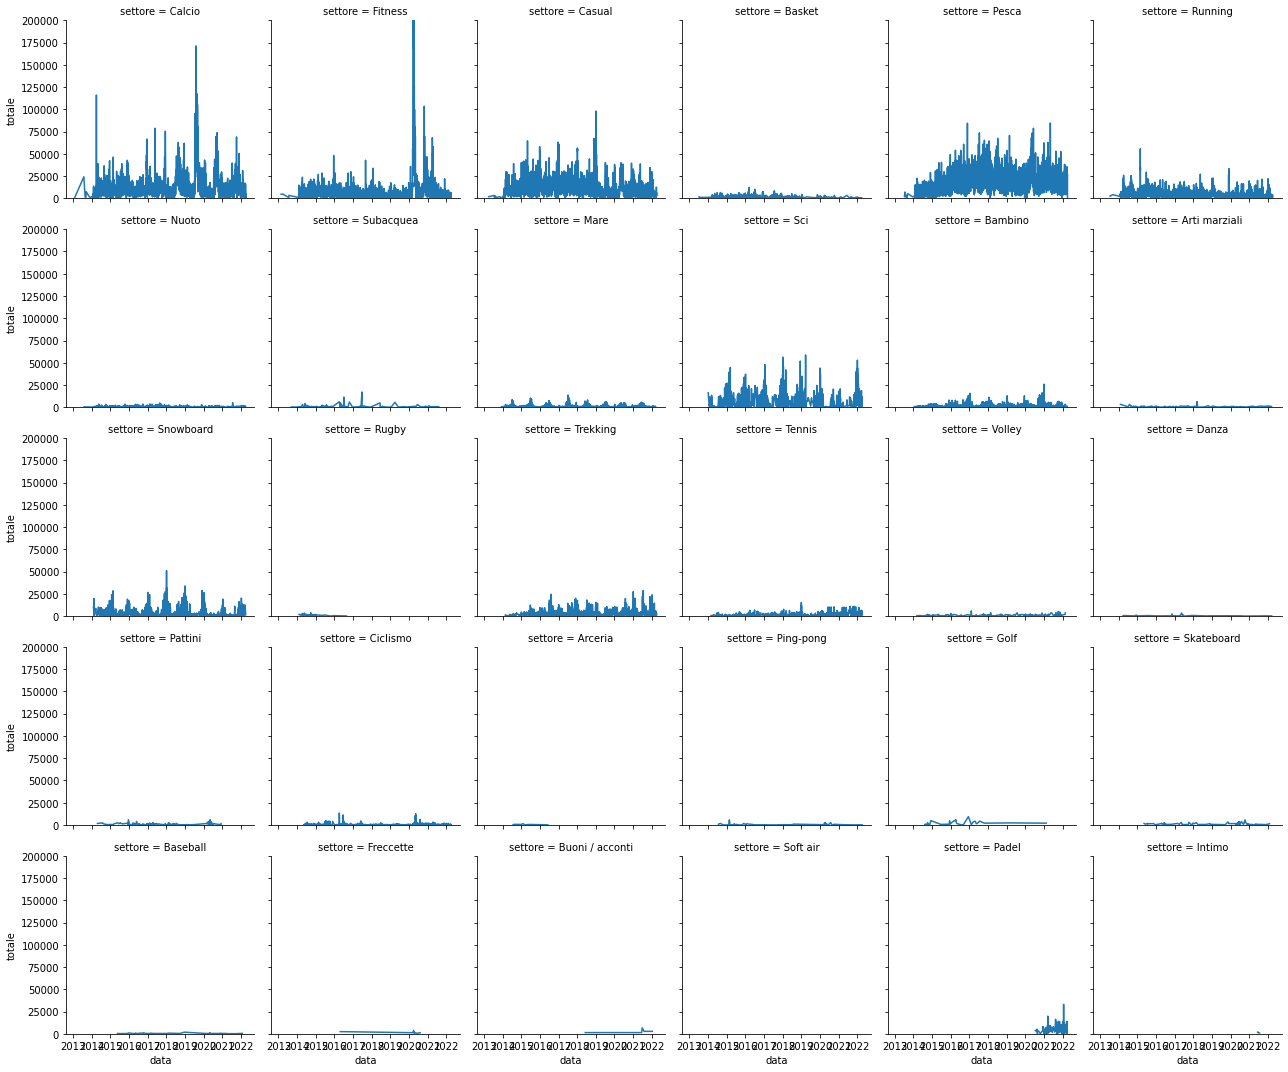

In [26]:
facet = sns.FacetGrid(data = df,  col = 'settore',  col_wrap = 6,  ylim = (0,200000))
facet.map(sns.lineplot, 'data', 'totale');

In [48]:
revenue_by_year = (df.groupby(['year','settore'])['totale'].sum()/df.groupby(['year'])['totale'].sum() * 100).reset_index()

In [74]:
pd.Series(df[df['year'] == 2019].groupby('settore')['totale'].sum()/df[df['year'] == 2019]['totale'].sum()).sort_values(ascending = False)

settore
Calcio           0.352342
Pesca            0.290334
Casual           0.136082
Fitness          0.054965
Sci              0.045472
Running          0.042669
Snowboard        0.027988
Trekking         0.020337
Bambino          0.009824
Mare             0.007192
Tennis           0.006012
Basket           0.001676
Nuoto            0.001570
Volley           0.001228
Ciclismo         0.000933
Subacquea        0.000395
Arti marziali    0.000343
Skateboard       0.000312
Pattini          0.000118
Danza            0.000110
Golf             0.000098
Name: totale, dtype: float64

<AxesSubplot:xlabel='year', ylabel='totale'>

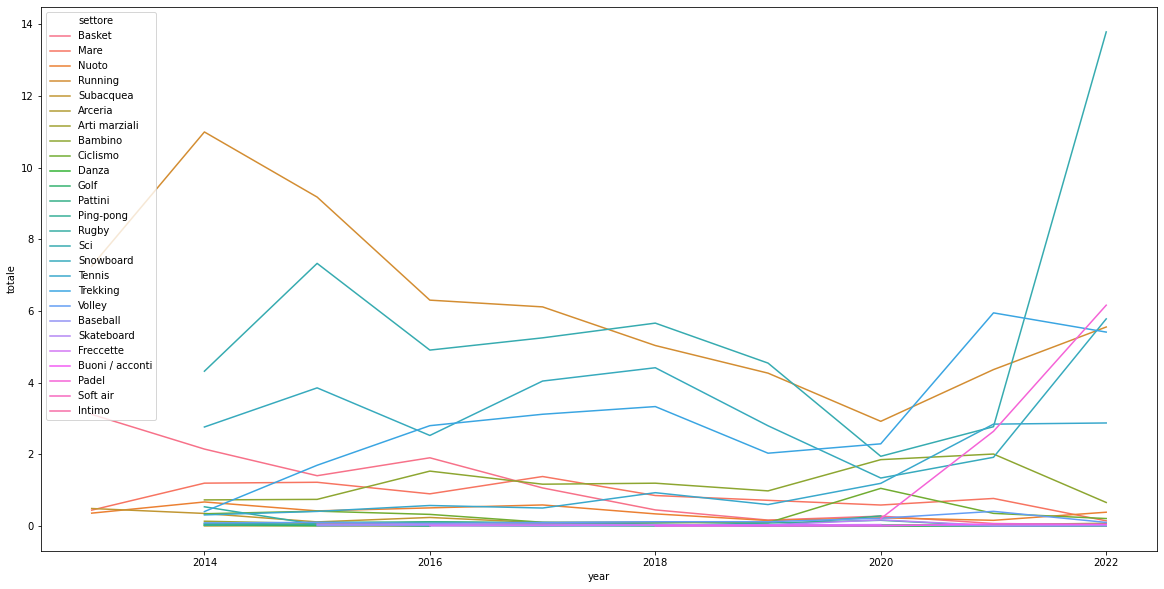

In [75]:
fig, ax = plt.subplots(figsize= (20,10))
sns.lineplot(ax = ax, x = 'year', y = 'totale', hue = 'settore', data = revenue_by_year[~revenue_by_year['settore'].isin(['Calcio', 'Casual', 'Fitness', 'Pesca'])])

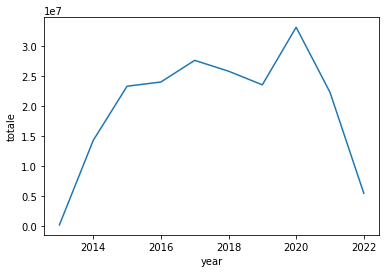

In [45]:
sns.lineplot(data = df.groupby('year')['totale'].sum().reset_index(), x = 'year', y = 'totale')
plt.show()

In [42]:
 df.groupby('year')['totale'].sum().reset_index()

,year,totale
0,2013,135109.92
1,2014,14229171.16
2,2015,23261330.71
3,2016,23966354.99
4,2017,27576549.66
5,2018,25772287.57
6,2019,23495116.38
7,2020,33098771.40
8,2021,22262714.25
9,2022,5416885.27
